In [79]:
img = io.imread('/home/ubuntu/DeepMobile/data/NewData4/JPEGImages/train/0.jpg')

In [131]:
from skimage import io
import cv2
import numpy as np

def pad_input(input_img,patch_size=[256,256]):
    h = input_img.shape[0]
    w = input_img.shape[1]
    hMod = h % patch_size[0]
    wMod = w % patch_size[1]
    if(hMod!=0 or wMod!=0):
        hPad = patch_size[0]-hMod
        wPad = patch_size[1]-wMod
    output = np.pad(img, ((0, hPad),(0,wPad),(0,0)), 'constant')
    return(output)

def prediction_patches(img,patch_size=[256,256]):
   
    print(img.shape)
    assert(img.shape[0]%patch_size[0]==0 and img.shape[1]%patch_size[1]==0)
    h_patch = int(img.shape[0]/patch_size[0])
    w_patch = int(img.shape[1]/patch_size[1])
    patches = []
    x = 0
   
    no = 0
    for i in range(h_patch):
        y = 0 
        for j in range(w_patch):
            
            
            patch = img[x:(((i+1)*256)),y:(((j+1)*256)),:]
            print(y)
            print(patch.shape)
            print(j)
            y = ((j+1)*256)
            #print('yes')
            no+=1
            patches.append(patch)
        x = ((i+1)*256)
    
    return patches

def reconstruct_patches(patches= np.ones((16,256,256,3)),img_shape=[1024,1024,3]):
    full_img = np.empty(img_shape).astype('uint8')
    h = img_shape[0]
    w = img_shape[1]
    c = img_shape[2]
    h_patch = int(h / patches.shape[1])
    w_patch = int(w / patches.shape[2])
    no = 0 
    x = 0
    
    assert(h_patch*w_patch == patches.shape[0])
    for i in range(h_patch):
        y = 0
        for j in range(w_patch):
            full_img[x:(((i+1)*256)),y:((j+1)*256),:] = patches[no]
            print('yes')
            y = ((j+1)*256)
            no += 1  
        x = ((i+1)*256)
    return full_img

In [132]:
X = prediction_patches(pad_input(img))

(1280, 2048, 3)
0
(256, 256, 3)
0
256
(256, 256, 3)
1
512
(256, 256, 3)
2
768
(256, 256, 3)
3
1024
(256, 256, 3)
4
1280
(256, 256, 3)
5
1536
(256, 256, 3)
6
1792
(256, 256, 3)
7
0
(256, 256, 3)
0
256
(256, 256, 3)
1
512
(256, 256, 3)
2
768
(256, 256, 3)
3
1024
(256, 256, 3)
4
1280
(256, 256, 3)
5
1536
(256, 256, 3)
6
1792
(256, 256, 3)
7
0
(256, 256, 3)
0
256
(256, 256, 3)
1
512
(256, 256, 3)
2
768
(256, 256, 3)
3
1024
(256, 256, 3)
4
1280
(256, 256, 3)
5
1536
(256, 256, 3)
6
1792
(256, 256, 3)
7
0
(256, 256, 3)
0
256
(256, 256, 3)
1
512
(256, 256, 3)
2
768
(256, 256, 3)
3
1024
(256, 256, 3)
4
1280
(256, 256, 3)
5
1536
(256, 256, 3)
6
1792
(256, 256, 3)
7
0
(256, 256, 3)
0
256
(256, 256, 3)
1
512
(256, 256, 3)
2
768
(256, 256, 3)
3
1024
(256, 256, 3)
4
1280
(256, 256, 3)
5
1536
(256, 256, 3)
6
1792
(256, 256, 3)
7


In [24]:
def reconstruct_patches(patches= np.ones((16,256,256,3)),img_shape=[1024,1024,3]):
    full_img = np.empty(img_shape).astype('uint8')
    h = img_shape[0]
    w = img_shape[1]
    c = img_shape[2]
    h_patch = int(h / patches.shape[1])
    w_patch = int(w / patches.shape[2])
    no = 0 
    x = 0
    
    assert(h_patch*w_patch == patches.shape[0])
    for i in range(h_patch):
        y = 0
        for j in range(w_patch):
            full_img[x:(((i+1)*256)),y:((j+1)*256),:] = patches[no]
            print('yes')
            y = ((j+1)*256)
            no += 1  
        x = ((i+1)*256)
    return full_img

In [135]:
x = np.array(X)

In [138]:
imgs = pad_input(img)
imgs.shape

(1280, 2048, 3)

In [139]:
z = reconstruct_patches(patches=x,img_shape=[1280,2048,3])

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [140]:
print(z.shape)

(1280, 2048, 3)


/home/ubuntu/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


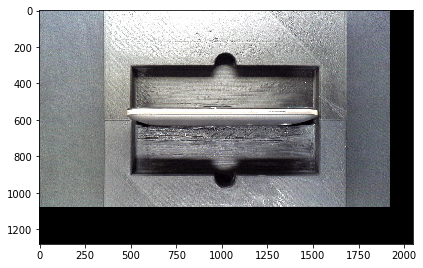

In [141]:
io.imshow(z)


In [106]:
imgs[0:1300,0:2048,:]

array([[[166, 183, 190],
        [156, 173, 180],
        [140, 157, 164],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[169, 186, 193],
        [166, 183, 190],
        [156, 173, 180],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[145, 160, 167],
        [153, 168, 175],
        [156, 171, 178],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [143]:
assert(1==1)